In [1]:
import pandas as pd
import random


num_patients = 900
data = []

for patient_id in range(100, num_patients + 1):
    date_of_surgery = f"2023-08-{random.randint(1, 31)}"
    age = random.randint(40, 90)
    gender = random.choice(["Male", "Female"])
    location = random.choice(["LA", "SF", "SD", "LV"])
    follow_up= f"{random.randint(1, 12)}"
    
    comments = random.choice([
    "I have a lot of pain when I close my eyes",
    "It doesn't hurt at all",
    "It feels swollen",
    "I feel fine",
    "It's very itchy",
    "My eye feels dry and red",
    "I am not sure",
    "It's OK",
    "It's been great",
    "It improved after taking Advil",
    "Tylenol did not help with pain",
    "Motrin was very helpful ",
    "Aleve made me noxious",
    "No complaints"
    ])

    data.append([patient_id, date_of_surgery, age, gender, location, follow_up, comments])


df = pd.DataFrame(data, columns=["Patient_ID", "Date_of_Surgery", "Age", "Gender", "Location", "Follow-up (weeks)", "Comment"])


df.to_csv("cataract_surgery_postop.csv", index=False)

df.head(10)

,Patient_ID,Date_of_Surgery,Age,Gender,Location,Follow-up (weeks),Comment
0,100,2023-08-10,54,Male,SD,11,No complaints
1,101,2023-08-2,62,Female,SF,12,It's very itchy
2,102,2023-08-17,82,Male,LA,2,I have a lot of pain when I close my eyes
3,103,2023-08-8,44,Male,SD,11,I have a lot of pain when I close my eyes
4,104,2023-08-15,82,Female,LA,1,Aleve made me noxious
5,105,2023-08-18,86,Male,SD,2,It's been great
6,106,2023-08-15,65,Female,LV,2,It doesn't hurt at all
7,107,2023-08-29,65,Male,SD,2,My eye feels dry and red
8,108,2023-08-9,76,Male,LV,5,My eye feels dry and red
9,109,2023-08-29,72,Male,SF,12,It doesn't hurt at all


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()



# Defining custom sentiment labels
custom_labels = {
    "positive": ["It's been great",  "Motrin was very helpful","It improved after taking Advil","I feel fine", "No complaints", "It doesn't hurt at all."],
    "negative": ["It feels swollen",  "Aleve made me noxious", "Tylenol did not help with pain", "I have a lot of pain when I close my eyes",  "It's very itchy", "My eye feels dry and red",  "My eye feels dry and red",],
    "neutral": [ "I am not sure", "It's OK"]
}
 

    
# Assigning custom labels
def assign_sentiment(comment):
    for label, keywords in custom_labels.items():
        if any(keyword in comment for keyword in keywords):
            return label
    return "neutral"


df['Sentiment'] = df['Comment'].apply(assign_sentiment)

df.sample(10)


,Patient_ID,Date_of_Surgery,Age,Gender,Location,Follow-up (weeks),Comment,Sentiment
454,554,2023-08-11,87,Female,LV,2,No complaints,positive
673,773,2023-08-15,52,Male,LA,10,It feels swollen,negative
102,202,2023-08-31,57,Female,LV,4,I am not sure,neutral
41,141,2023-08-17,60,Male,SF,7,Motrin was very helpful,positive
483,583,2023-08-11,56,Female,LA,11,It doesn't hurt at all,neutral
692,792,2023-08-25,72,Female,LA,5,No complaints,positive
57,157,2023-08-4,80,Female,LA,2,No complaints,positive
415,515,2023-08-21,82,Male,SD,8,It feels swollen,negative
388,488,2023-08-19,42,Male,LA,3,I am not sure,neutral
775,875,2023-08-6,82,Female,LA,11,It improved after taking Advil,positive


In [3]:
sentiment_counts = df['Sentiment'].value_counts()

print(sentiment_counts)

negative    353
positive    279
neutral     169
Name: Sentiment, dtype: int64


In [4]:
# Tokenizing comments

df['Tokens'] = df['Comment'].apply(word_tokenize)

df[['Comment', 'Tokens']].head(10)

,Comment,Tokens
0,No complaints,"[No, complaints]"
1,It's very itchy,"[It, 's, very, itchy]"
2,I have a lot of pain when I close my eyes,"[I, have, a, lot, of, pain, when, I, close, my..."
3,I have a lot of pain when I close my eyes,"[I, have, a, lot, of, pain, when, I, close, my..."
4,Aleve made me noxious,"[Aleve, made, me, noxious]"
5,It's been great,"[It, 's, been, great]"
6,It doesn't hurt at all,"[It, does, n't, hurt, at, all]"
7,My eye feels dry and red,"[My, eye, feels, dry, and, red]"
8,My eye feels dry and red,"[My, eye, feels, dry, and, red]"
9,It doesn't hurt at all,"[It, does, n't, hurt, at, all]"


In [5]:
# Performing token frequency analysis
tokens = [token for comment_tokens in df['Tokens'] for token in comment_tokens]
freq_dist = FreqDist(tokens)


most_common_tokens = freq_dist.most_common(10)


print("Most common tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

Most common tokens:
It: 337
I: 212
's: 159
very: 133
feels: 120
not: 114
pain: 109
Motrin: 72
was: 72
helpful: 72


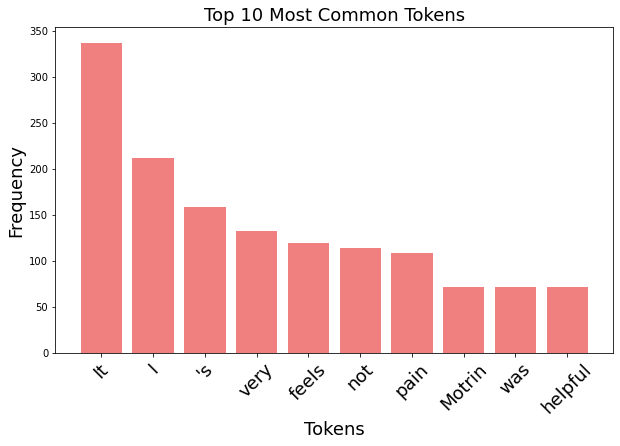

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

most_common_tokens = freq_dist.most_common(10)

tokens, frequencies = zip(*most_common_tokens)


plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies, color='lightcoral')
plt.xlabel("Tokens", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.title("Top 10 Most Common Tokens",fontsize=18)
plt.xticks(rotation=45, fontsize=18)  

plt.show()




In [7]:

#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

custom_stop_words = {'It','I', "'s",'feels','feel', 'My'}
 
stop_words.update(custom_stop_words)

#keyword extraction based on token frequency
tokens = [token for comment_tokens in df['Tokens'] for token in comment_tokens]
freq_dist = FreqDist(tokens)

# Filtering out stopwords
filtered_tokens = [token for token in freq_dist if token not in stop_words]

filtered_tokens


['pain',
 'Motrin',
 'helpful',
 'Aleve',
 'made',
 'noxious',
 'itchy',
 'improved',
 'taking',
 'Advil',
 'eye',
 'dry',
 'red',
 'swollen',
 'sure',
 'No',
 'complaints',
 "n't",
 'hurt',
 'lot',
 'close',
 'eyes',
 'Tylenol',
 'help',
 'OK',
 'great',
 'fine']

In [8]:
# Named Entity Recognition


words_to_find = ["Motrin", "Aleve", "Tylenol", "Advil"]


def find_words_in_comments(comment):
    found_words = [word for word in words_to_find if word in comment.lower()]
    return ', '.join(found_words) if found_words else "None"

# ApplyING the function to the DataFrame
df['Found_Words'] = df['Comment'].apply(find_words_in_comments)


df[['Comment', 'Found_Words']].sample(10)


,Comment,Found_Words
271,I have a lot of pain when I close my eyes,None
158,I am not sure,None
251,Motrin was very helpful,None
155,Aleve made me noxious,None
435,Motrin was very helpful,None
21,I am not sure,None
134,I am not sure,None
761,It's very itchy,None
728,Aleve made me noxious,None
545,It's very itchy,None


In [9]:
# creating function to check if words are present in a comment
def contains_words(comment):
    return any(word in comment for word in words_to_find)

# Filtering DataFrame 
filtered_df = df[df['Comment'].apply(contains_words)]

print(filtered_df[['Comment']])
print()
print()
print(filtered_df[['Comment']].value_counts())

                            Comment
4             Aleve made me noxious
14         Motrin was very helpful 
22            Aleve made me noxious
24         Motrin was very helpful 
26   Tylenol did not help with pain
..                              ...
787        Motrin was very helpful 
788  Tylenol did not help with pain
794  It improved after taking Advil
798        Motrin was very helpful 
800  Tylenol did not help with pain

[250 rows x 1 columns]


Comment                       
Motrin was very helpful           72
Aleve made me noxious             63
It improved after taking Advil    61
Tylenol did not help with pain    54
dtype: int64


In [10]:
#Statistical Analysis

from scipy.stats import chi2_contingency


# Creating a contingency table to perform a chi-squared test
contingency_table = pd.crosstab(df['Sentiment'], df['Follow-up (weeks)'])

# Perform a chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Determining the relationship based on p-value
alpha = 0.05        # significance level
if p < alpha:
    relationship = "significant"
else:
    relationship = "not significant"

# Results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print(f"The relationship between Sentiment and Follow-up duration is {relationship}.")


Chi-squared statistic: 15.776071813143986
P-value: 0.8268418422490285
The relationship between Sentiment and Follow-up duration is not significant.


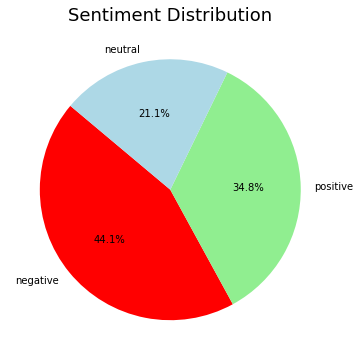

In [11]:


# Grouping data by sentiment 
sentiment_counts = df["Sentiment"].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts,labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'lightgreen', 'lightblue'])


plt.title("Sentiment Distribution", fontsize=18)


plt.show()

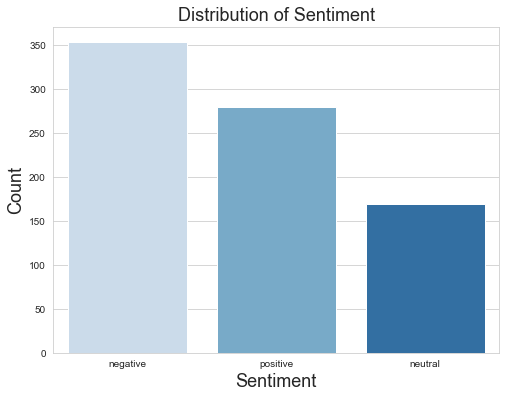

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns



# Occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

#Sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues")

plt.xlabel("Sentiment", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Distribution of Sentiment", fontsize=18)

plt.show()
